### ETL

Una vez entendido el contexto de la problemática y teniendo bien claros los requerimientos del cliente procedemos a hacer el ETL, donde prepararemos nuestros datos para responder consultas o preparar los modelos de aprendizaje automático, y de esa manera optimizar el rendimiento de la API y el entrenamiento del modelo.


Es importante no perder el foco de nuestros endpoints objetivo:

- **def developer( desarrollador : str )**: Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora. 
- **def userdata( User_id : str )**: Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.
- **def UserForGenre( genero : str )**: Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año de lanzamiento.
- **def best_developer_year( año : int )**: Devuelve el top 3 de desarrolladores con juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos).
- **def developer_reviews_analysis( desarrolladora : str )**: Según el desarrollador, se devuelve un diccionario con el nombre del desarrollador como llave y una lista con la cantidad total de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento como valor positivo o negativo.


In [4]:
# IMPORTAMOS LAS LIBRERIAS NECESARIAS

import pandas as pd
import numpy as np

Cargamos nuestro dataset

In [5]:
df = pd.read_json('output_steam_games.json',lines=True)


In [6]:
df

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


In [7]:
df.shape

(120445, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


### VALORES NULOS

Revisamos cantidad de nulos que tienen las columnas y cuantas filas en blanco hay. Es necesario eliminar muchas filas del dataset que estan completamente en blanco. 

In [9]:
df1 = df.dropna(how='all')

In [10]:
df1.shape

(32135, 13)

In [11]:
id_nulos = df1['id'].isnull().sum()
print(f'el dataset tiene {id_nulos} filas sin el dato id')

el dataset tiene 2 filas sin el dato id


In [12]:
# BORRAMOS LAS FILAS QUE NO TINEN EL DATO ID

df2 = df1.dropna(subset=['id'])

In [13]:
df2.shape

(32133, 13)

Eliminamos las columnas que son irrelevantes para nuestro futuro consumo de datos.

In [14]:
df3 = df2.drop(columns=['publisher', 'app_name','url','tags','reviews_url','specs','early_access'])

In [15]:
df3

,genres,title,release_date,price,id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,Free To Play,643980.0,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,Free to Play,670290.0,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
88314,None,None,None,2.99,773570.0,None
...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada
120442,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",EXIT 2 - Directions,2017-09-02,4.99,658870.0,"xropi,stev3ns"


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28851 non-null  object 
 1   title         30084 non-null  object 
 2   release_date  30067 non-null  object 
 3   price         30756 non-null  object 
 4   id            32133 non-null  float64
 5   developer     28835 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [17]:
#ELIMINAMOS LAS FILAS QUE NO TIENEN AL MENOS 4 VALORES VALIDOS (no nulos) 

df4 = df3.dropna(thresh=4)

In [18]:
df4

,genres,title,release_date,price,id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,Free To Play,643980.0,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,Free to Play,670290.0,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,772540.0,Trickjump Games Ltd
...,...,...,...,...,...,...
120439,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,1.99,745400.0,Bidoniera Games
120440,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada
120442,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich


In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30073 entries, 88310 to 120443
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28850 non-null  object 
 1   title         30073 non-null  object 
 2   release_date  30055 non-null  object 
 3   price         28824 non-null  object 
 4   id            30073 non-null  float64
 5   developer     28835 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


### TIPO DE DATO

### Revisamos el tipo de cada columna del dataset. Si es necesario realizamos conversiones de tipos de datos. 

In [20]:
print(df4.dtypes)

# Convertimos: prince>float / id>int / release_date>date

genres           object
title            object
release_date     object
price            object
id              float64
developer        object
dtype: object


Hacemos cambios en la columna price > normalizamos datos

In [21]:
### antes de pasar la columna price a float, debemos cambiar los juegos free por valor 0

df4['price'] = df4['price'].fillna(0)

C:\Users\pauda\AppData\Local\Temp\ipykernel_17360\741709529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price'] = df4['price'].fillna(0)


In [22]:
# Conteo de valores no numericos en la columna price
valores_no_numericos = df4['price'][~df4['price'].apply(pd.to_numeric, errors='coerce').notnull()]
conteo_valores_no_numericos = valores_no_numericos.value_counts()
print(conteo_valores_no_numericos)

price
Free                             713
Free to Play                     473
Free To Play                     370
Free Mod                           4
Free Demo                          3
Play Now                           2
Third-party                        2
Play for Free!                     2
Play WARMACHINE: Tactics Demo      1
Install Theme                      1
Install Now                        1
Free HITMAN™ Holiday Pack          1
Play the Demo                      1
Starting at $499.00                1
Starting at $449.00                1
Free to Try                        1
Free Movie                         1
Free to Use                        1
Name: count, dtype: int64


In [ ]:
df4['price'] = df4['price'].replace(to_replace=r'Free.*', value='0', regex=True)
df4['price'] = df4['price'].replace('0', 0)

In [24]:
valores_unicos = df4['price'].unique()
valores_unicos

array([4.99, 0, 0.99, 3.99, 9.99, 18.99, 29.99, 10.99, 2.99,
       1.5899999999999999, 14.99, 1.99, 59.99, 8.99, 6.99, 7.99, 39.99,
       19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25, 24.99, 17.99, 61.99,
       3.49, 11.99, 13.99, 'Play for 0', 34.99, 74.76, 1.49, 32.99, 99.99,
       14.95, 69.99, 16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96,
       119.99, 109.99, 149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99, 54.99,
       74.99, 'Install Theme', 0.89, 'Third-party', 0.5, 'Play Now',
       299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99, 10.93,
       1.3900000000000001, 36.99, 4.49, 2.0, 4.0, 234.99,
       1.9500000000000002, 1.5, 199.0, 189.0, 6.66, 27.99, 10.49, 129.99,
       179.0, 26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33, 22.99, 320.0,
       38.85, 71.7, 995.0, 27.49, 3.39, 6.0, 19.95, 499.99, 199.99, 16.06,
       4.68, 131.4, 44.98, 202.76, 1.0, 2.3, 0.9500000000000001, 172.24,
       249.99, 2.969

In [ ]:
df4['price'] = df4['price'].replace('Play for 0', 0)
df4['price'] = df4['price'].replace('Install Now', 0)
df4['price'] = df4['price'].replace('Play WARMACHINE: Tactics Demo',None)
df4['price'] = df4['price'].replace('Install Theme', None)
df4['price'] = df4['price'].replace('Third-party', None)
df4['price'] = df4['price'].replace('Play the Demo', None)
df4['price'] = df4['price'].replace('Starting at $499.00', 499.00)
df4['price'] = df4['price'].replace('Play Now', 0)

In [26]:
valores_unicos = df4['price'].unique()
valores_unicos

array([4.99, 0, 0.99, 3.99, 9.99, 18.99, 29.99, 10.99, 2.99,
       1.5899999999999999, 14.99, 1.99, 59.99, 8.99, 6.99, 7.99, 39.99,
       19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25, 24.99, 17.99, 61.99,
       3.49, 11.99, 13.99, 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 21.99, 89.99, None, 0.98, 139.92, 4.29, 64.99,
       54.99, 74.99, 0.89, 0.5, 299.99, 1.29, 3.0, 15.0, 5.49, 23.99,
       49.0, 20.99, 10.93, 1.3900000000000001, 36.99, 4.49, 2.0, 4.0,
       234.99, 1.9500000000000002, 1.5, 199.0, 189.0, 6.66, 27.99, 10.49,
       129.99, 179.0, 26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33,
       22.99, 320.0, 38.85, 71.7, 995.0, 27.49, 3.39, 6.0, 19.95, 499.99,
       199.99, 16.06, 4.68, 131.4, 44.98, 202.76, 1.0, 2.3,
       0.9500000000000001, 172.24, 249.99, 2.9699999999999998, 10.96,
       10.0, 30.0, 2.66, 6.48, 19.29, 11.15, 99.0, 87.94, 599.0, 0.49,
       9.98, 9.95, 7.

In [27]:
conteo_inicial = len(df4)
df4 = df4[df4['price'] != 'Starting at $449.00']

conteo_final = len(df4)
filas_borradas = conteo_inicial - conteo_final

print("Se borraron {} filas.".format(filas_borradas))

Se borraron 1 filas.


In [28]:
df4['price'] = pd.to_numeric(df4['price'], errors='coerce')
df4['price'] = df4['price'].round(2)

C:\Users\pauda\AppData\Local\Temp\ipykernel_17360\3636304895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price'] = pd.to_numeric(df4['price'], errors='coerce')
C:\Users\pauda\AppData\Local\Temp\ipykernel_17360\3636304895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price'] = df4['price'].round(2)


In [29]:
print(df4['price'].dtypes)

float64


Cambiamos el tipo de dato en la columna id. De float a int

In [30]:
df4['id'] = df4['id'].astype(int)

C:\Users\pauda\AppData\Local\Temp\ipykernel_17360\1597104226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['id'] = df4['id'].astype(int)


In [31]:
print(df4['id'].dtypes)

int32


Cambiamos el tipo de dato en la columna date. De object a date

In [32]:
import re

patron = r'(\d{4})'  # Este patrón busca 4 dígitos consecutivos en una cadena cruda (r: raw).

def año(cadena:str) -> str|None:
    """
    La función año toma la cadena de texto y devuelve un año en formato entero
    o None si la cadena está vacía.
    """
    match = re.search(patron, str(cadena))
    if match:
        return match.group(1)
    else:
        return None

df4['release_date'] = df4['release_date'].apply(año)

C:\Users\pauda\AppData\Local\Temp\ipykernel_17360\3218042311.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['release_date'] = df4['release_date'].apply(año)


In [33]:
anios_unicos = df4['release_date'].unique()
anios_unicos

array(['2018', '2017', None, '1997', '1998', '2016', '2006', '2005',
       '2003', '2007', '2002', '2000', '1995', '1996', '1994', '2001',
       '1993', '2004', '1999', '2008', '2009', '1992', '1989', '2010',
       '2011', '2013', '2012', '2014', '1983', '1984', '2015', '1990',
       '1988', '1991', '1985', '1982', '1987', '1981', '1986', '2021',
       '5275', '2019', '1975', '1970', '1980'], dtype=object)

In [34]:
cantidad_anios_nulos = df4['release_date'].isna().sum()
print("Cantidad de valores nulos en la columna 'release_date':", cantidad_anios_nulos)

Cantidad de valores nulos en la columna 'release_date': 119


In [35]:
df4['release_date'] = pd.to_numeric(df4['release_date'], errors='coerce').astype('Int64')

C:\Users\pauda\AppData\Local\Temp\ipykernel_17360\3352899084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['release_date'] = pd.to_numeric(df4['release_date'], errors='coerce').astype('Int64')


In [36]:
print(df4['release_date'].dtypes)

Int64


In [37]:
# Vemos un dato extraño, el año 5275. Veremos a que datos pertenece
anio_5275 = df4[df4['release_date'] == 5275]

print(anio_5275)

                               genres                title  release_date  \
101738  [Casual, Indie, Early Access]  Puzzle Sisters Foer          5275   

        price      id developer  
101738    0.0  710190    一次元创作组  


In [38]:
impostacion_anio_5275 = df4[df4['title'] == 'Puzzle Sisters Foer']
print(impostacion_anio_5275)
#podemos ver que el dato es solo 1, intentamos buscar el verdadero anio de lanzamiento pero no hay otro dato con la misma id o con le mismo titulo de contenido.
#siendo un outlier que nos puede llegar a desestabilizar las consultas , procedemos a eliminar la fila

                               genres                title  release_date  \
101738  [Casual, Indie, Early Access]  Puzzle Sisters Foer          5275   

        price      id developer  
101738    0.0  710190    一次元创作组  


In [39]:
df5 = df4.drop(101738)

In [40]:
anios_unicos = df5['release_date'].unique()
anios_unicos

<IntegerArray>
[2018, 2017, <NA>, 1997, 1998, 2016, 2006, 2005, 2003, 2007, 2002, 2000, 1995,
 1996, 1994, 2001, 1993, 2004, 1999, 2008, 2009, 1992, 1989, 2010, 2011, 2013,
 2012, 2014, 1983, 1984, 2015, 1990, 1988, 1991, 1985, 1982, 1987, 1981, 1986,
 2021, 2019, 1975, 1970, 1980]
Length: 44, dtype: Int64

In [41]:
print(df5.dtypes)

genres           object
title            object
release_date      Int64
price           float64
id                int32
developer        object
dtype: object


In [42]:
df5

,genres,title,release_date,price,id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,0.00,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,0.00,670290,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,2017,0.99,767400,彼岸领域
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018,3.99,772540,Trickjump Games Ltd
...,...,...,...,...,...,...
120439,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018,1.99,745400,Bidoniera Games
120440,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018,1.99,773640,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018,4.99,733530,Sacada
120442,"[Indie, Racing, Simulation]",Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich


Hacemos cambios en la columna genres > desanidamos las listas 

In [43]:
df6 = df5.explode('genres')

In [44]:
df6

,genres,title,release_date,price,id,developer
88310,Action,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Casual,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Indie,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Simulation,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Strategy,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
...,...,...,...,...,...,...
120442,Indie,Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich
120442,Racing,Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich
120442,Simulation,Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich
120443,Casual,EXIT 2 - Directions,2017,4.99,658870,"xropi,stev3ns"


### NORMALIZACION DEL DATASET (Buenas prácticas)

Realizamos las transformaciones que se consideren pertinentes con el fin de preparar los datos > mayusculas, minusculas, cammel, snake, etc

In [45]:
#cambiamos nombres de columnas

nuevos_nombres = {'genres': 'genre', 'id': 'content_id'}
df7 = df6.rename(columns=nuevos_nombres)

In [46]:
df7.head(3)

,genre,title,release_date,price,content_id,developer
88310,Action,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Casual,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Indie,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro


In [47]:
#Columna genero:

generos_unicos = df7['genre'].unique()
generos_unicos

array(['Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing',
       'Early Access', None, 'Massively Multiplayer',
       'Animation &amp; Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design &amp; Illustration', 'Audio Production', 'Photo Editing',
       'Accounting'], dtype=object)

In [48]:
## Normalizamos nombres:

df7['genre'] = df7['genre'].replace('Animation &amp; Modeling', 'Animation and Modeling')
df7['genre'] = df7['genre'].replace('Design &amp; Illustration', 'Design and Illustration')

In [49]:
#Columna title:

title_unicos = df7['title'].value_counts()
title_unicos

title
AutoTileSet                               11
Rebons                                    10
Multiplicity                              10
Assault Corps 2                           10
GAME TUBE ♛                                9
                                          ..
Overlord™                                  1
Blind Men                                  1
Fate/EXTELLA - Casual Vacances             1
Fate/EXTELLA - Rose Vacances               1
FSX: Steam Edition - Air Alaska Add-On     1
Name: count, Length: 30041, dtype: int64

Cambiamos el orden de las columnas

In [50]:
reordenar = ['content_id', 'title', 'genre', 'developer', 'release_date', 'price']  # Cambia esta lista según el orden deseado

# Reordenar las columnas del DataFrame
df8 = df7[reordenar]

df8.head(3)

,content_id,title,genre,developer,release_date,price
88310,761140,Lost Summoner Kitty,Action,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Casual,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Indie,Kotoshiro,2018,4.99


### DISTRIBUCIÓN DE DATOS

Vemos si en las columnas existen valores atípicos.

COLUMNA PRECIO

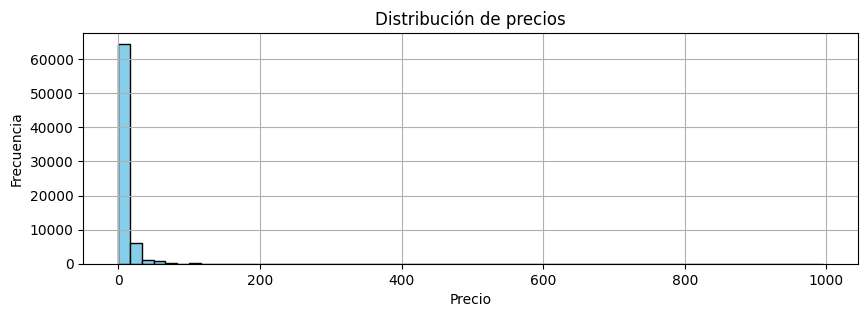

In [51]:
### Comenzamos a ya ver un poco la distribución de datos. Para ver si hay datos atipicos. Hacemos un grafico de distribucion de datos

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 3))
plt.hist(df8['price'], bins=60, color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios')
plt.grid(True)
plt.show()

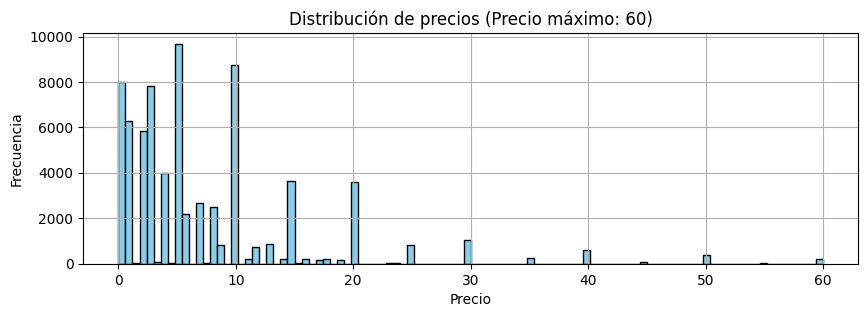

In [52]:
df_filtered = df8[df8['price'] <= 60]

# Crear el gráfico de distribución de datos
plt.figure(figsize=(10, 3))
plt.hist(df_filtered['price'], bins=100, range=(0, 60), color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios (Precio máximo: 60)')
plt.grid(True)
plt.show()

In [53]:
conteo_valores_cero = (df8['price'] == 0).sum()
conteo_valores_cero

7992

In [54]:
precio_maximo = df8['price'].max()
precio_minimo = df8['price'].min()

print(f'Precio min: {precio_minimo}. Precio max: {precio_maximo}')


Precio min: 0.0. Precio max: 995.0


In [55]:
juego_max = df8[df8['price'] == 995.0]
print(juego_max)

        content_id                                            title  \
100398      719000  Strata Spaces VR – Professional Edition Upgrade   
100398      719000  Strata Spaces VR – Professional Edition Upgrade   

                          genre                   developer  release_date  \
100398   Animation and Modeling  Strata Mixed Reality, Inc.          2017   
100398  Design and Illustration  Strata Mixed Reality, Inc.          2017   

        price  
100398  995.0  
100398  995.0  


COLUMNA GENERO

In [56]:
generos_unicos = df8['genre'].unique()
generos_unicos

array(['Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing',
       'Early Access', None, 'Massively Multiplayer',
       'Animation and Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design and Illustration', 'Audio Production', 'Photo Editing',
       'Accounting'], dtype=object)

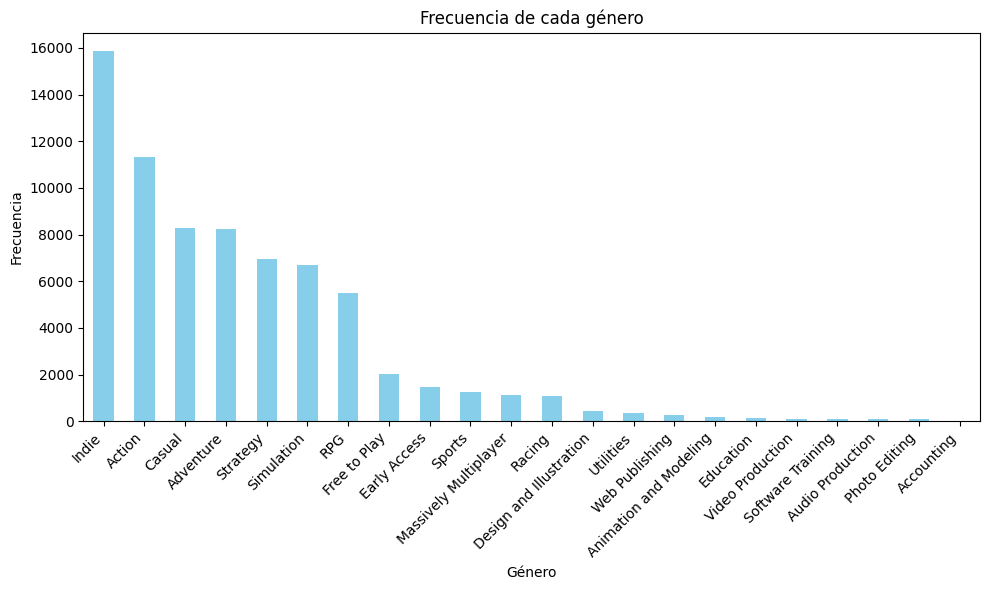

In [57]:
conteo_generos = df8['genre'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_generos.plot(kind='bar', color='skyblue')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
df8


,content_id,title,genre,developer,release_date,price
88310,761140,Lost Summoner Kitty,Action,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Casual,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Indie,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Simulation,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Strategy,Kotoshiro,2018,4.99
...,...,...,...,...,...,...
120442,610660,Russian Roads,Indie,Laush Dmitriy Sergeevich,2018,1.99
120442,610660,Russian Roads,Racing,Laush Dmitriy Sergeevich,2018,1.99
120442,610660,Russian Roads,Simulation,Laush Dmitriy Sergeevich,2018,1.99
120443,658870,EXIT 2 - Directions,Casual,"xropi,stev3ns",2017,4.99


### EXPORTACIÓN DE DATOS

Primero exportamos a csv

In [57]:
df8.to_csv('output_steam_games.csv', index=False)

Exportamos la base de datos preparada en un archivo .parquet para el modelamiento

In [ ]:
pip install pyarrow

In [59]:
df8.to_parquet('output_steam_games.parquet', index=False, engine='pyarrow', compression= 'snappy')

### GENERACIÓN DE DATASET ESPECÍFICO PARA ENDPOINT 1

Devuelve cantidad de items y porcentaje de contenido Free por año según empresa desarrollador

In [59]:
df7.head()

,genre,title,release_date,price,content_id,developer
88310,Action,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Casual,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Indie,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Simulation,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88310,Strategy,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro


In [60]:
df9 = df7.drop(columns=['genre'])

In [61]:
df_consulta1 = df9.drop_duplicates(subset='content_id')
df_consulta1

,title,release_date,price,content_id,developer
88310,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88311,Ironbound,2018,0.00,643980,Secret Level SRL
88312,Real Pool 3D - Poolians,2017,0.00,670290,Poolians.com
88313,弹炸人2222,2017,0.99,767400,彼岸领域
88315,Battle Royale Trainer,2018,3.99,772540,Trickjump Games Ltd
...,...,...,...,...,...
120439,Kebab it Up!,2018,1.99,745400,Bidoniera Games
120440,Colony On Mars,2018,1.99,773640,"Nikita ""Ghost_RUS"""
120441,LOGistICAL: South Africa,2018,4.99,733530,Sacada
120442,Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich


Exportamos el primer dataset en parquet

In [60]:
df_consulta1.to_parquet('consulta1.parquet', index=False, engine='pyarrow', compression= 'snappy')

### GENERACIÓN DE MUESTRA CONSIDERABLE PARA REALIZAR LAS SIGUIENTES CONSULTAS

In [62]:
games = df8.iloc[:30000:]

In [63]:
games.shape

(30000, 6)

In [65]:
games.to_parquet('games.parquet', index=False, engine='pyarrow', compression= 'snappy')

In [64]:
games.head()

,content_id,title,genre,developer,release_date,price
88310,761140,Lost Summoner Kitty,Action,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Casual,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Indie,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Simulation,Kotoshiro,2018,4.99
88310,761140,Lost Summoner Kitty,Strategy,Kotoshiro,2018,4.99


### ARMADO DE DATASET PARA SISTEMA DE RECOMENDACION

In [81]:
df2.head(1)


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro


In [82]:
df_similitud = df2.drop(columns=['publisher', 'app_name','url','release_date','reviews_url','price','early_access','developer'])

In [83]:
df_similitud.head()

,genres,title,tags,specs,id
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],761140.0
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",643980.0
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",670290.0
88313,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",[Single-player],767400.0
88314,None,None,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",773570.0


In [84]:
df_similitud.shape

(32133, 5)

In [85]:
df_similitud.dropna()

,genres,title,tags,specs,id
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],761140.0
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",643980.0
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",670290.0
88313,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",[Single-player],767400.0
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,"[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",772540.0
...,...,...,...,...,...
120439,"[Action, Adventure, Casual, Indie]",Kebab it Up!,"[Action, Indie, Casual, Violent, Adventure]","[Single-player, Steam Achievements, Steam Cloud]",745400.0
120440,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,"[Strategy, Indie, Casual, Simulation]","[Single-player, Steam Achievements]",773640.0
120441,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,"[Strategy, Indie, Casual]","[Single-player, Steam Achievements, Steam Clou...",733530.0
120442,"[Indie, Racing, Simulation]",Russian Roads,"[Indie, Simulation, Racing]","[Single-player, Steam Achievements, Steam Trad...",610660.0


In [86]:
df_similitud['id'] = df_similitud['id'].astype(int)

In [87]:
nuevos_nombres = {'genres': 'genre', 'id': 'content_id'}
df_similitud1 = df_similitud.rename(columns=nuevos_nombres)

In [88]:
df_similitud1['genre'] = df_similitud1['genre'].replace('Animation &amp; Modeling', 'Animation and Modeling')
df_similitud1['genre'] = df_similitud1['genre'].replace('Design &amp; Illustration', 'Design and Illustration')

In [89]:
reordenar = ['content_id', 'title', 'genre', 'tags', 'specs']  # Cambia esta lista según el orden deseado

# Reordenar las columnas del DataFrame
df_similitud2 = df_similitud1[reordenar]

df_similitud2.head(3)

,content_id,title,genre,tags,specs
88310,761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player]
88311,643980,Ironbound,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla..."
88312,670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla..."


In [90]:
#Seleccionamos el genero, el tag, y la spec principal de cada item.

df_similitud3 = df_similitud2.copy()
df_similitud3['genre'] = df_similitud2['genre'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df_similitud3['tags'] = df_similitud2['tags'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df_similitud3['specs'] = df_similitud2['specs'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

In [91]:
df_similitud3

,content_id,title,genre,tags,specs
88310,761140,Lost Summoner Kitty,Action,Strategy,Single-player
88311,643980,Ironbound,Free to Play,Free to Play,Single-player
88312,670290,Real Pool 3D - Poolians,Casual,Free to Play,Single-player
88313,767400,弹炸人2222,Action,Action,Single-player
88314,773570,None,None,Action,Single-player
...,...,...,...,...,...
120440,773640,Colony On Mars,Casual,Strategy,Single-player
120441,733530,LOGistICAL: South Africa,Casual,Strategy,Single-player
120442,610660,Russian Roads,Indie,Indie,Single-player
120443,658870,EXIT 2 - Directions,Casual,Indie,Single-player


In [92]:
null_counts = df_similitud3.isnull().sum()
print(null_counts)

content_id       0
title         2049
genre         3282
tags           162
specs          669
dtype: int64


In [93]:
df_similitud4 = df_similitud3.dropna()

In [95]:
df_similitud4

,content_id,title,genre,tags,specs
88310,761140,Lost Summoner Kitty,Action,Strategy,Single-player
88311,643980,Ironbound,Free to Play,Free to Play,Single-player
88312,670290,Real Pool 3D - Poolians,Casual,Free to Play,Single-player
88313,767400,弹炸人2222,Action,Action,Single-player
88315,772540,Battle Royale Trainer,Action,Action,Single-player
...,...,...,...,...,...
120439,745400,Kebab it Up!,Action,Action,Single-player
120440,773640,Colony On Mars,Casual,Strategy,Single-player
120441,733530,LOGistICAL: South Africa,Casual,Strategy,Single-player
120442,610660,Russian Roads,Indie,Indie,Single-player


Exportacion de dataset especifico para Modelo de similitud del coseno

In [98]:
df_similitud4.to_parquet('recomendacion.parquet', index=False, engine='pyarrow', compression= 'snappy')